Importing required Libraries

In [1]:
# pandas, numpy ans seaborne
import numpy as np
import pandas as pd
# association rule and apriori algorithm
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

Loading Dataset using Pandas library

In [2]:
data = pd.read_excel('Dataset.xlsx')
data.head()

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


Datatype Information about each columns in dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9    Mitoses                     699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


Dataset Column names

In [4]:
data.columns

Index(['id ', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', ' Mitoses ', 'Class'],
      dtype='object')

Droping ID columns, beacuse this column have unique values

In [5]:
data.drop(['id '], axis=1, inplace=True)
data.dropna(inplace=True)

In [6]:
data

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


Creating Function for converting categorical into numerical 

In [7]:
def handle_cat_data(cat_feats, data):
    for f in cat_feats:
        to_add = pd.get_dummies(data[f], prefix=f, drop_first=True)
        merged_list = data.join(
            to_add, how='left', lsuffix='_left', rsuffix='_right')
        data = merged_list

   
    data.drop(cat_feats, axis=1, inplace=True)
    return data


# Explanation

The Apriori Algorithm, used for the first phase of the Association Rules, is the most popular and classical algorithm in the frequent old parts. These algorithm properties and data are evaluated with Boolean Association Rules. In this algorithm, there are product clusters that pass frequently, and then strong relationships between these products and other products are sought.

The importance of an Association Rules can be determined by 3 parameters that are used to identify the strength of the algorithm. Namely,

Support
Confidence
Lift
Let X and Y represent the products in the market and N represents the total number of products.

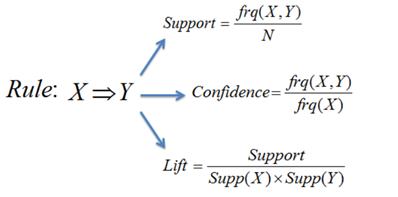

Support : It is the probability of an event to occur.

Confidence : It is a measure of conditional probability

Lift : It is the probability of all items occurring together divided by the product of antecedent and consequent occurring as if they are independent of each other.

In [8]:
data = pd.DataFrame(data)
cat_feats =['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', ' Mitoses ', 'Class']
data = handle_cat_data(cat_feats, data)

freq_item_set = apriori(data, min_support=0.07, use_colnames=True)
freq_item_set.head()

,support,itemsets
0,0.071531,(Clump Thickness_2)
1,0.154506,(Clump Thickness_3)
2,0.114449,(Clump Thickness_4)
3,0.185980,(Clump Thickness_5)
4,0.098712,(Clump Thickness_10)


In [9]:
freq_item_set

,support,itemsets
0,0.071531,(Clump Thickness_2)
1,0.154506,(Clump Thickness_3)
2,0.114449,(Clump Thickness_4)
3,0.185980,(Clump Thickness_5)
4,0.098712,(Clump Thickness_10)
5,0.074392,(Uniformity of Cell Size_3)
6,0.095851,(Uniformity of Cell Size_10)
7,0.084406,(Uniformity of Cell Shape_2)
8,0.080114,(Uniformity of Cell Shape_3)
9,0.082976,(Uniformity of Cell Shape_10)


In [10]:
rules = association_rules(freq_item_set, metric="lift")
print(rules.head())

                       antecedents                      consequents  \
0  (Single Epithelial Cell Size_2)              (Clump Thickness_3)   
1              (Clump Thickness_3)  (Single Epithelial Cell Size_2)   
2              (Clump Thickness_4)  (Single Epithelial Cell Size_2)   
3  (Single Epithelial Cell Size_2)              (Clump Thickness_4)   
4  (Single Epithelial Cell Size_2)              (Clump Thickness_5)   

   antecedent support  consequent support   support  confidence      lift  \
0            0.552217            0.154506  0.108727    0.196891  1.274324   
1            0.154506            0.552217  0.108727    0.703704  1.274324   
2            0.114449            0.552217  0.085837    0.750000  1.358161   
3            0.552217            0.114449  0.085837    0.155440  1.358161   
4            0.552217            0.185980  0.103004    0.186528  1.002949   

   leverage  conviction  
0  0.023406    1.052776  
1  0.023406    1.511266  
2  0.022636    1.791130  
3  0.0

In [11]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Single Epithelial Cell Size_2),(Clump Thickness_3),0.552217,0.154506,0.108727,0.196891,1.274324,0.023406,1.052776
1,(Clump Thickness_3),(Single Epithelial Cell Size_2),0.154506,0.552217,0.108727,0.703704,1.274324,0.023406,1.511266
2,(Clump Thickness_4),(Single Epithelial Cell Size_2),0.114449,0.552217,0.085837,0.750000,1.358161,0.022636,1.791130
3,(Single Epithelial Cell Size_2),(Clump Thickness_4),0.552217,0.114449,0.085837,0.155440,1.358161,0.022636,1.048536
4,(Single Epithelial Cell Size_2),(Clump Thickness_5),0.552217,0.185980,0.103004,0.186528,1.002949,0.000303,1.000674


In [12]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Single Epithelial Cell Size_2),(Clump Thickness_3),0.552217,0.154506,0.108727,0.196891,1.274324,0.023406,1.052776
1,(Clump Thickness_3),(Single Epithelial Cell Size_2),0.154506,0.552217,0.108727,0.703704,1.274324,0.023406,1.511266
2,(Clump Thickness_4),(Single Epithelial Cell Size_2),0.114449,0.552217,0.085837,0.750000,1.358161,0.022636,1.791130
3,(Single Epithelial Cell Size_2),(Clump Thickness_4),0.552217,0.114449,0.085837,0.155440,1.358161,0.022636,1.048536
4,(Single Epithelial Cell Size_2),(Clump Thickness_5),0.552217,0.185980,0.103004,0.186528,1.002949,0.000303,1.000674
5,(Clump Thickness_5),(Single Epithelial Cell Size_2),0.185980,0.552217,0.103004,0.553846,1.002949,0.000303,1.003651
6,(Class_4),(Clump Thickness_10),0.344778,0.098712,0.098712,0.286307,2.900415,0.064679,1.262851
7,(Clump Thickness_10),(Class_4),0.098712,0.344778,0.098712,1.000000,2.900415,0.064679,inf
8,(Class_4),(Uniformity of Cell Size_10),0.344778,0.095851,0.095851,0.278008,2.900415,0.062804,1.252298
9,(Uniformity of Cell Size_10),(Class_4),0.095851,0.344778,0.095851,1.000000,2.900415,0.062804,inf


In [13]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,(Single Epithelial Cell Size_2),(Clump Thickness_3),0.552217,0.154506,0.108727,0.196891,1.274324,0.023406,1.052776,1
1,(Clump Thickness_3),(Single Epithelial Cell Size_2),0.154506,0.552217,0.108727,0.703704,1.274324,0.023406,1.511266,1
2,(Clump Thickness_4),(Single Epithelial Cell Size_2),0.114449,0.552217,0.085837,0.750000,1.358161,0.022636,1.791130,1
3,(Single Epithelial Cell Size_2),(Clump Thickness_4),0.552217,0.114449,0.085837,0.155440,1.358161,0.022636,1.048536,1
4,(Single Epithelial Cell Size_2),(Clump Thickness_5),0.552217,0.185980,0.103004,0.186528,1.002949,0.000303,1.000674,1
5,(Clump Thickness_5),(Single Epithelial Cell Size_2),0.185980,0.552217,0.103004,0.553846,1.002949,0.000303,1.003651,1
6,(Class_4),(Clump Thickness_10),0.344778,0.098712,0.098712,0.286307,2.900415,0.064679,1.262851,1
7,(Clump Thickness_10),(Class_4),0.098712,0.344778,0.098712,1.000000,2.900415,0.064679,inf,1
8,(Class_4),(Uniformity of Cell Size_10),0.344778,0.095851,0.095851,0.278008,2.900415,0.062804,1.252298,1
9,(Uniformity of Cell Size_10),(Class_4),0.095851,0.344778,0.095851,1.000000,2.900415,0.062804,inf,1


In [14]:
rules[ (rules['antecedent_len'] >= 1) &
       (rules['confidence'] > 0.75) &
       (rules['lift'] > 1.2) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
7,(Clump Thickness_10),(Class_4),0.098712,0.344778,0.098712,1.000000,2.900415,0.064679,inf,1
9,(Uniformity of Cell Size_10),(Class_4),0.095851,0.344778,0.095851,1.000000,2.900415,0.062804,inf,1
11,(Uniformity of Cell Shape_10),(Class_4),0.082976,0.344778,0.082976,1.000000,2.900415,0.054367,inf,1
13,(Marginal Adhesion_10),(Class_4),0.078684,0.344778,0.077253,0.981818,2.847680,0.050125,36.037196,1
15,(Bland Chromatin_2),(Single Epithelial Cell Size_2),0.237482,0.552217,0.184549,0.777108,1.407251,0.053408,2.008970,1
19,(Bare Nuclei_10),(Class_4),0.188841,0.344778,0.184549,0.977273,2.834496,0.119441,28.829757,1
21,(Bland Chromatin_7),(Class_4),0.104435,0.344778,0.094421,0.904110,2.622293,0.058414,6.833027,1
23,(Normal Nucleoli_10),(Class_4),0.087268,0.344778,0.087268,1.000000,2.900415,0.057180,inf,1


In [15]:
rules[rules['antecedents'] == {'Uniformity of Cell Size_10'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
9,(Uniformity of Cell Size_10),(Class_4),0.095851,0.344778,0.095851,1.0,2.900415,0.062804,inf,1


In [16]:

y = data['Class_4']
x = data.drop('Class_4',axis =1)


In [17]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

from genetic_selection import GeneticSelectionCV
estimator = linear_model.LinearRegression()

selector = GeneticSelectionCV(estimator,cv=5,
                                  verbose=1,
                                  scoring="r2",
                                  max_features=10,
                                  n_population=400,
                                  crossover_proba=0.5,
                                  mutation_proba=0.2,
                                  n_generations=40,
                                  crossover_independent_proba=0.5,
                                  mutation_independent_proba=0.05,
                                  tournament_size=3,
                                  n_gen_no_change=10,
                                  caching=True,
                                  n_jobs=-1)
selector = selector.fit(x, y)

print(selector.support_)

Selecting features with genetic algorithm.
gen	nevals	avg                            	std                            	min                            	max                               
0  	400   	[ 0.189728  5.31      0.073531]	[ 0.163894  2.846735  0.038738]	[-0.075035  1.        0.008323]	[  0.616671  10.         0.21099 ]
1  	244   	[-1674.730063     7.855     1675.080086]	[ 3734.337869     3.057609  3734.180863]	[-10000.            0.            0.008323]	[     0.62143     17.       10000.     ]
2  	223   	[-1249.639193     7.98      1250.099508]	[ 3307.325513     2.620038  3307.151529]	[-10000.          1.          0.0171]      	[     0.62143     19.       10000.     ]
3  	230   	[-1974.604274     8.685     1975.098546]	[ 3981.32367      2.51113   3981.078465]	[-10000.            3.            0.023331]	[     0.63872     18.       10000.     ]
4  	237   	[-1874.5641       8.7275    1875.098914]	[ 3903.333149     2.333076  3903.076233]	[-10000.            3.            0.032975]	[ 

In [18]:
final_feature = selector.support_

In [19]:
x.columns

Index(['Clump Thickness_2', 'Clump Thickness_3', 'Clump Thickness_4',
       'Clump Thickness_5', 'Clump Thickness_6', 'Clump Thickness_7',
       'Clump Thickness_8', 'Clump Thickness_9', 'Clump Thickness_10',
       'Uniformity of Cell Size_2', 'Uniformity of Cell Size_3',
       'Uniformity of Cell Size_4', 'Uniformity of Cell Size_5',
       'Uniformity of Cell Size_6', 'Uniformity of Cell Size_7',
       'Uniformity of Cell Size_8', 'Uniformity of Cell Size_9',
       'Uniformity of Cell Size_10', 'Uniformity of Cell Shape_2',
       'Uniformity of Cell Shape_3', 'Uniformity of Cell Shape_4',
       'Uniformity of Cell Shape_5', 'Uniformity of Cell Shape_6',
       'Uniformity of Cell Shape_7', 'Uniformity of Cell Shape_8',
       'Uniformity of Cell Shape_9', 'Uniformity of Cell Shape_10',
       'Marginal Adhesion_2', 'Marginal Adhesion_3', 'Marginal Adhesion_4',
       'Marginal Adhesion_5', 'Marginal Adhesion_6', 'Marginal Adhesion_7',
       'Marginal Adhesion_8', 'Marginal A

In [20]:
features=[x.columns]
feature_selected = []
for i in range(len(final_feature)):
    if final_feature[i] == True:
        print(i)

6
7
8
36
49
51
52
53
66
72


In [21]:
x.columns

Index(['Clump Thickness_2', 'Clump Thickness_3', 'Clump Thickness_4',
       'Clump Thickness_5', 'Clump Thickness_6', 'Clump Thickness_7',
       'Clump Thickness_8', 'Clump Thickness_9', 'Clump Thickness_10',
       'Uniformity of Cell Size_2', 'Uniformity of Cell Size_3',
       'Uniformity of Cell Size_4', 'Uniformity of Cell Size_5',
       'Uniformity of Cell Size_6', 'Uniformity of Cell Size_7',
       'Uniformity of Cell Size_8', 'Uniformity of Cell Size_9',
       'Uniformity of Cell Size_10', 'Uniformity of Cell Shape_2',
       'Uniformity of Cell Shape_3', 'Uniformity of Cell Shape_4',
       'Uniformity of Cell Shape_5', 'Uniformity of Cell Shape_6',
       'Uniformity of Cell Shape_7', 'Uniformity of Cell Shape_8',
       'Uniformity of Cell Shape_9', 'Uniformity of Cell Shape_10',
       'Marginal Adhesion_2', 'Marginal Adhesion_3', 'Marginal Adhesion_4',
       'Marginal Adhesion_5', 'Marginal Adhesion_6', 'Marginal Adhesion_7',
       'Marginal Adhesion_8', 'Marginal A

In [22]:
features = ['Clump Thickness_2', 'Clump Thickness_3', 'Clump Thickness_4',
       'Clump Thickness_5', 'Clump Thickness_6', 'Clump Thickness_7',
       'Clump Thickness_8', 'Clump Thickness_9', 'Clump Thickness_10',
       'Uniformity of Cell Size_2', 'Uniformity of Cell Size_3',
       'Uniformity of Cell Size_4', 'Uniformity of Cell Size_5',
       'Uniformity of Cell Size_6', 'Uniformity of Cell Size_7',
       'Uniformity of Cell Size_8', 'Uniformity of Cell Size_9',
       'Uniformity of Cell Size_10', 'Uniformity of Cell Shape_2',
       'Uniformity of Cell Shape_3', 'Uniformity of Cell Shape_4',
       'Uniformity of Cell Shape_5', 'Uniformity of Cell Shape_6',
       'Uniformity of Cell Shape_7', 'Uniformity of Cell Shape_8',
       'Uniformity of Cell Shape_9', 'Uniformity of Cell Shape_10',
       'Marginal Adhesion_2', 'Marginal Adhesion_3', 'Marginal Adhesion_4',
       'Marginal Adhesion_5', 'Marginal Adhesion_6', 'Marginal Adhesion_7',
       'Marginal Adhesion_8', 'Marginal Adhesion_9', 'Marginal Adhesion_10',
       'Single Epithelial Cell Size_2', 'Single Epithelial Cell Size_3',
       'Single Epithelial Cell Size_4', 'Single Epithelial Cell Size_5',
       'Single Epithelial Cell Size_6', 'Single Epithelial Cell Size_7',
       'Single Epithelial Cell Size_8', 'Single Epithelial Cell Size_9',
       'Single Epithelial Cell Size_10', 'Bare Nuclei_2', 'Bare Nuclei_3',
       'Bare Nuclei_4', 'Bare Nuclei_5', 'Bare Nuclei_6', 'Bare Nuclei_7',
       'Bare Nuclei_8', 'Bare Nuclei_9', 'Bare Nuclei_10', 'Bare Nuclei_?',
       'Bland Chromatin_2', 'Bland Chromatin_3', 'Bland Chromatin_4',
       'Bland Chromatin_5', 'Bland Chromatin_6', 'Bland Chromatin_7',
       'Bland Chromatin_8', 'Bland Chromatin_9', 'Bland Chromatin_10',
       'Normal Nucleoli_2', 'Normal Nucleoli_3', 'Normal Nucleoli_4',
       'Normal Nucleoli_5', 'Normal Nucleoli_6', 'Normal Nucleoli_7',
       'Normal Nucleoli_8', 'Normal Nucleoli_9', 'Normal Nucleoli_10',
       ' Mitoses _2', ' Mitoses _3', ' Mitoses _4', ' Mitoses _5',
       ' Mitoses _6', ' Mitoses _7', ' Mitoses _8', ' Mitoses _10']
feature_selected = []
for i in range(len(final_feature)):
    if final_feature[i] == True:
        feature_selected.append(features[i])
X = x[feature_selected]

In [23]:
#pip install sklearn-genetic

In [24]:
%matplotlib inline

#Import module to split the datasets
from sklearn.model_selection import train_test_split
# Import modules to evaluate the metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,auc
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [25]:
import tensorflow as tf
import tensorflow.keras.layers as L
import tensorflow.keras.models as M
from tensorflow.keras.optimizers import Adam
def get_model():
    inputs = L.Input(shape = x_train.shape[1])
    x = L.BatchNormalization()(inputs)
    x = L.Dense(units = 50, activation = "relu")(x)
    x = L.Reshape((10, 5))(x)
    x = L.Conv1D(filters = 8, kernel_size = 3, padding = "same", strides = 1)(x)
    x = L.BatchNormalization()(x)
    x = L.Activation("relu")(x)
    x = L.AveragePooling1D(pool_size = 2)(x) 
    x = L.Conv1D(filters = 8, kernel_size = 3, padding = "same", strides = 1)(x)
    x = L.BatchNormalization()(x)
    x = L.Activation("relu")(x)
    x = L.Conv1D(filters = 8, kernel_size = 3, padding = "same", strides = 1)(x)
    x = L.BatchNormalization()(x)
    x = L.Activation("relu")(x)   
    x = L.Conv1D(filters = 8, kernel_size = 3, padding = "same", strides = 1)(x)
    x = L.BatchNormalization()(x)
    x = L.Activation("relu")(x)   
    x = L.MaxPooling1D(pool_size = 1)(x)
    x = L.Flatten()(x)
    for i in range(2):
        x = L.BatchNormalization()(x)
        x = L.Dropout(0.01)(x)
        x = L.Dense(50 // (2 ** i), activation = "relu")(x)
    x = L.Dense(1, activation = "sigmoid")(x)
    model = M.Model(inputs = inputs, outputs = x)
    model.compile(optimizer = Adam(), loss = "binary_crossentropy", metrics = ["accuracy"])
    return model
model = get_model()
#model.summary()
history=model.fit(x_train, y_train, batch_size = 15, epochs = 250,verbose=1)

Epoch 1/250
33/33 [==============================] - 5s 9ms/step - loss: 0.3305 - accuracy: 0.8732
Epoch 2/250
33/33 [==============================] - 0s 9ms/step - loss: 0.1942 - accuracy: 0.9264
Epoch 3/250
33/33 [==============================] - 0s 9ms/step - loss: 0.1915 - accuracy: 0.9407
Epoch 4/250
33/33 [==============================] - 0s 9ms/step - loss: 0.1674 - accuracy: 0.9448
Epoch 5/250
33/33 [==============================] - 0s 9ms/step - loss: 0.1852 - accuracy: 0.9427
Epoch 6/250
33/33 [==============================] - 0s 6ms/step - loss: 0.1670 - accuracy: 0.9427
Epoch 7/250
33/33 [==============================] - 0s 5ms/step - loss: 0.1666 - accuracy: 0.9448
Epoch 8/250
33/33 [==============================] - 0s 7ms/step - loss: 0.1595 - accuracy: 0.9468
Epoch 9/250
33/33 [==============================] - 0s 6ms/step - loss: 0.1565 - accuracy: 0.9468
Epoch 10/250
33/33 [==============================] - 0s 6ms/step - loss: 0.1400 - accuracy: 0.9448
Epoch 11/

33/33 [==============================] - 0s 8ms/step - loss: 0.1311 - accuracy: 0.9530
Epoch 84/250
33/33 [==============================] - 0s 8ms/step - loss: 0.1266 - accuracy: 0.9530
Epoch 85/250
33/33 [==============================] - 0s 7ms/step - loss: 0.1275 - accuracy: 0.9468
Epoch 86/250
33/33 [==============================] - 0s 8ms/step - loss: 0.1346 - accuracy: 0.9530
Epoch 87/250
33/33 [==============================] - 0s 6ms/step - loss: 0.1271 - accuracy: 0.9550
Epoch 88/250
33/33 [==============================] - 0s 6ms/step - loss: 0.1287 - accuracy: 0.9489
Epoch 89/250
33/33 [==============================] - 0s 6ms/step - loss: 0.1250 - accuracy: 0.9530
Epoch 90/250
33/33 [==============================] - 0s 6ms/step - loss: 0.1323 - accuracy: 0.9509
Epoch 91/250
33/33 [==============================] - 0s 5ms/step - loss: 0.1346 - accuracy: 0.9509
Epoch 92/250
33/33 [==============================] - 0s 4ms/step - loss: 0.1299 - accuracy: 0.9571
Epoch 93/250


33/33 [==============================] - 0s 4ms/step - loss: 0.1263 - accuracy: 0.9530
Epoch 165/250
33/33 [==============================] - 0s 6ms/step - loss: 0.1346 - accuracy: 0.9530
Epoch 166/250
33/33 [==============================] - 0s 6ms/step - loss: 0.1252 - accuracy: 0.9550
Epoch 167/250
33/33 [==============================] - 0s 6ms/step - loss: 0.1233 - accuracy: 0.9550
Epoch 168/250
33/33 [==============================] - 0s 6ms/step - loss: 0.1298 - accuracy: 0.9509
Epoch 169/250
33/33 [==============================] - 0s 6ms/step - loss: 0.1316 - accuracy: 0.9550
Epoch 170/250
33/33 [==============================] - 0s 7ms/step - loss: 0.1248 - accuracy: 0.9550
Epoch 171/250
33/33 [==============================] - 0s 7ms/step - loss: 0.1269 - accuracy: 0.9489
Epoch 172/250
33/33 [==============================] - 0s 7ms/step - loss: 0.1225 - accuracy: 0.9509
Epoch 173/250
33/33 [==============================] - 0s 5ms/step - loss: 0.1196 - accuracy: 0.9509
Epoc

33/33 [==============================] - 0s 8ms/step - loss: 0.1313 - accuracy: 0.9530
Epoch 246/250
33/33 [==============================] - 0s 9ms/step - loss: 0.1214 - accuracy: 0.9571
Epoch 247/250
33/33 [==============================] - 0s 8ms/step - loss: 0.1355 - accuracy: 0.9489
Epoch 248/250
33/33 [==============================] - 0s 8ms/step - loss: 0.1213 - accuracy: 0.9550
Epoch 249/250
33/33 [==============================] - 0s 8ms/step - loss: 0.1269 - accuracy: 0.9489
Epoch 250/250
33/33 [==============================] - 0s 8ms/step - loss: 0.1292 - accuracy: 0.9530


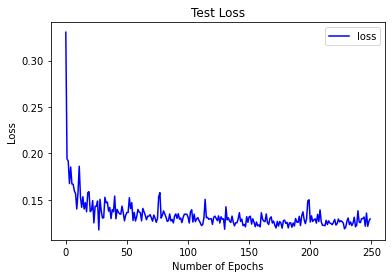

In [26]:
# Plot the loss and accuracy curves for training and validation 
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], color='b', label="loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

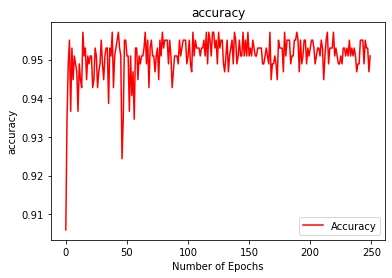

In [33]:
# Plot the loss and accuracy curves for training and validation 
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='r', label="Accuracy")
plt.title("accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

# Without Feature Selection

In [37]:
%matplotlib inline

#Import module to split the datasets
from sklearn.model_selection import train_test_split
# Import modules to evaluate the metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,auc
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.4)

In [41]:
import tensorflow as tf
import tensorflow.keras.layers as L
import tensorflow.keras.models as M
from tensorflow.keras.optimizers import Adam,SGD
def get_model():
    inputs = L.Input(shape = X_train.shape[1])
    x = L.BatchNormalization()(inputs)
    x = L.Dense(units = 50, activation = "relu")(x)
    x = L.Reshape((10, 5))(x)
    x = L.Conv1D(filters = 8, kernel_size = 3, padding = "same", strides = 1)(x)
    x = L.BatchNormalization()(x)
    x = L.Activation("relu")(x)
    x = L.AveragePooling1D(pool_size = 2)(x) 
    x = L.Conv1D(filters = 8, kernel_size = 3, padding = "same", strides = 1)(x)
    x = L.BatchNormalization()(x)
    x = L.Activation("relu")(x)
    x = L.Conv1D(filters = 8, kernel_size = 3, padding = "same", strides = 1)(x)
    x = L.BatchNormalization()(x)
    x = L.Activation("relu")(x)   
    x = L.Conv1D(filters = 8, kernel_size = 3, padding = "same", strides = 1)(x)
    x = L.BatchNormalization()(x)
    x = L.Activation("relu")(x)   
    x = L.MaxPooling1D(pool_size = 1)(x)
    x = L.Flatten()(x)
    for i in range(2):
        x = L.BatchNormalization()(x)
        x = L.Dropout(0.01)(x)
        x = L.Dense(50 // (2 ** i), activation = "relu")(x)
    x = L.Dense(1, activation = "sigmoid")(x)
    model = M.Model(inputs = inputs, outputs = x)
    model.compile(optimizer = SGD(learning_rate =10), loss = "binary_crossentropy", metrics = ["accuracy"])
    return model
model = get_model()
#model.summary()
history=model.fit(X_train, Y_train, batch_size = 15, epochs = 250,verbose=1)

Epoch 1/250
28/28 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.6038
Epoch 2/250
28/28 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6587
Epoch 3/250
28/28 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6587
Epoch 4/250
28/28 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6587
Epoch 5/250
28/28 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6587
Epoch 6/250
28/28 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6587
Epoch 7/250
28/28 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.6587
Epoch 8/250
28/28 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6587
Epoch 9/250
28/28 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6587
Epoch 10/250
28/28 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.6587
Epoch 11/250
28/28 [===================

28/28 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6587
Epoch 86/250
28/28 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6587
Epoch 87/250
28/28 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6587
Epoch 88/250
28/28 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6587
Epoch 89/250
28/28 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6587
Epoch 90/250
28/28 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6587
Epoch 91/250
28/28 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6587
Epoch 92/250
28/28 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6587
Epoch 93/250
28/28 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6587
Epoch 94/250
28/28 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6587
Epoch 95/250
28/28 [=======================

28/28 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6587
Epoch 169/250
28/28 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6587
Epoch 170/250
28/28 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6587
Epoch 171/250
28/28 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6587
Epoch 172/250
28/28 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6587
Epoch 173/250
28/28 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6587
Epoch 174/250
28/28 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6587
Epoch 175/250
28/28 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6587
Epoch 176/250
28/28 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6587
Epoch 177/250
28/28 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6587
Epoch 178/250
28/28 [=============

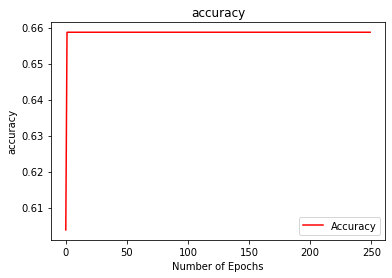

In [43]:
# Plot the loss and accuracy curves for training and validation 
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='r', label="Accuracy")
plt.title("accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

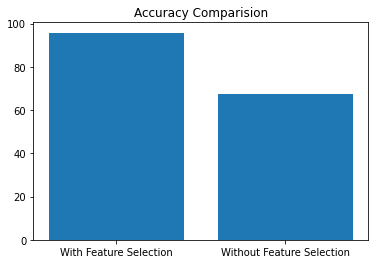

In [53]:
import matplotlib.pyplot as plt
y = [95.8,67.58]
x = ["With Feature Selection" , "Without Feature Selection"]
plt.bar(x,y)
plt.title('Accuracy Comparision')
plt.show()